### Dealing with Heterogeniety

This page is a reproducible work for Chapter 4.1 of Zuur et al. (2009). This particular example is useful to practice methods to address heterogeniety (heteroscedasticy) in linear regression models. 

One of the important assumptions in linear regression is "homeoscedasticy (homeogeneity) of variance", which means that the spread of dataset is same at each X values. (i.e. the spread of reponse is the same for along the range of predictor variable).

One way to deal with heterogeniety is 'a mean-variance stabilisng' transformation. 
Formal test for homeogeniety require normality of the data (e.g. Barlett's test). Zuur et al (2009) suggest assessing homoegeneity based on 'graphical inspection' of residuals (pp20).


Serious heterogeniety could cause major harm to invalidate the outcome of linear regression analysis. Ignoring such issue could leave the regression parameters with incorrect standard errors (Zuur et al. 2009), which leads to incorrect distribution of statistics (e.g., F / t statistic is no longer F / t distributed), thus harming statistical significance of the tests. 

With extra Mathematical effort, heterogeniety can be incorporated to models and can provide extra biological information (Zuur et al. 2009)

Starting with the squid data, our goal here is to model reproductive organ weight as the function of biotic and abiotic factors affecting sexual maturation, more specifically to determine the extent to which maturation is size-related (dorsal mantle length) and seasonal (month recorded). 

According to Zuur pp 73,

$Testisweight_{i}=intercept + DML_{i}+Month_{i} +DML_{i}:Month_{i}+ \varepsilon_{i}$

where
$\varepsilon_{i} \sim N(0,\sigma^2)$

Note that the notation ':' is for the interaction term of DML and Month.

In [9]:
source("src/HighstatLibV10.R")
library(nlme);library(dplyr)

Squid<-read.table("data/Squid.txt",header = TRUE)
Squid<-Squid%>%
      mutate(fMONTH=factor(MONTH))


Month is used as a nomial variable (with the function factor), and DML as a continuous variable.
Using linear model, the model:

$Testisweight_{i}=intercept + DML_{i}+Month_{i} +DML_{i}:Month_{i}+ \varepsilon_{i}$

where
$\varepsilon_{i} \sim N(0,\sigma^2)$

the residual is plotted below:

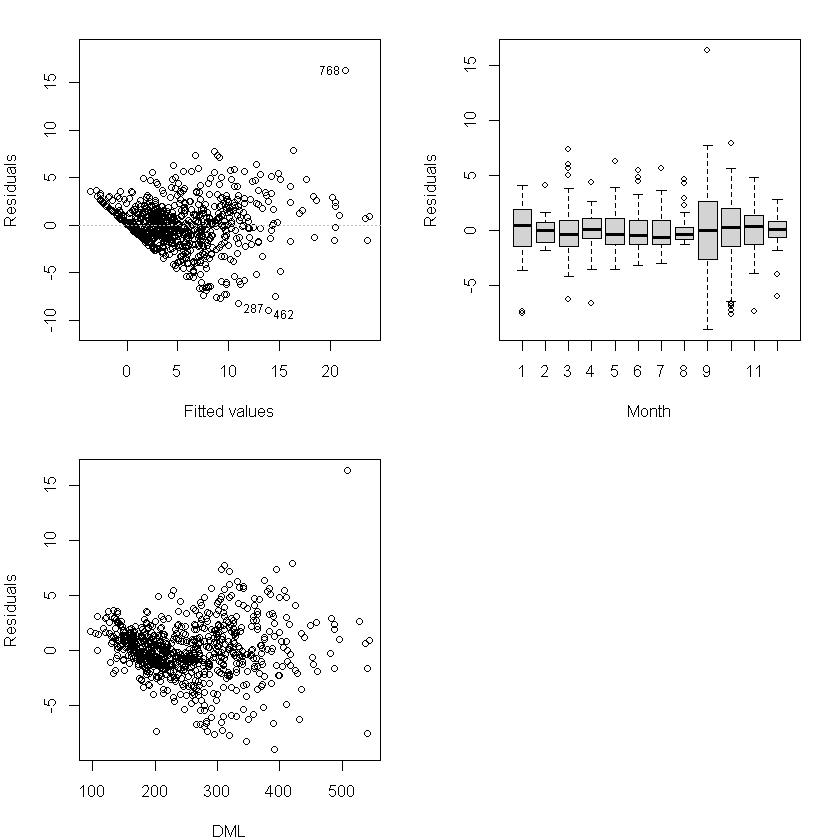

In [6]:
op<-par(mfrow=c(2,2), mar= c(4,4,2,2))
plot(M1,which =c(1), col=1, add.smooth=FALSE, caption="")
plot(Squid$fMONTH, resid(M1), xlab="Month", ylab="Residuals")
plot(Squid$DML, resid(M1), xlab="DML", ylab="Residuals")
par(op)

You could see homeogeniety of residuals, which needs to be addressed in the model. We find that variance becomes greater as DML increases, and they are different for different months.

Thus, we model the residual standard deviation as a funtion of DML, through power function, which has covariate variance structure as:
$$ \varepsilon_{ij} \sim N(0,\sigma^2 \times |DML_{ij}|^{2\delta} )$$

And then we normalize for standard residuals:
$$ \varepsilon_{ij}= \frac{Testisweight_{ij}-Fitted values_{ij}}{\sqrt{\sigma^2 \times |DML_{ij}|^{2\delta}}} $$

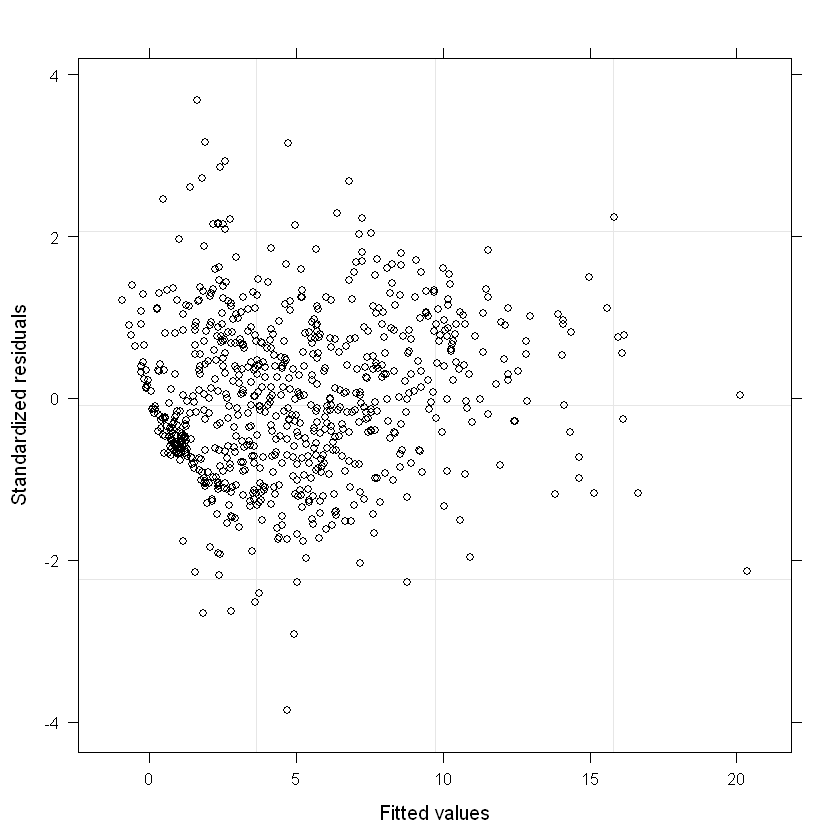

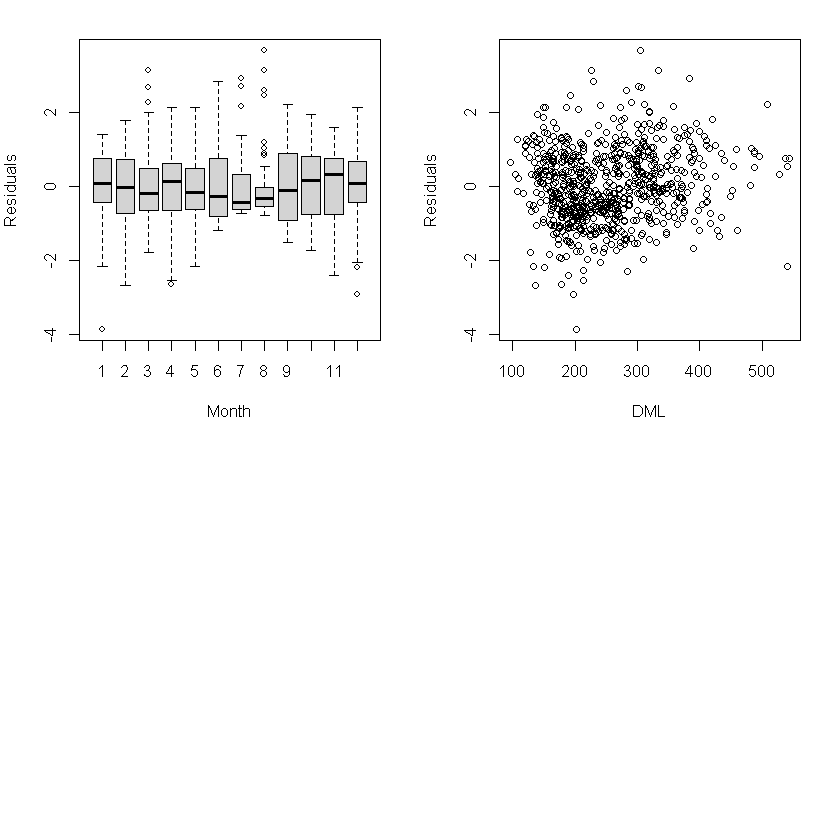

In [8]:
vf4<- varPower(form =~DML| fMONTH)
M.gls4<-gls(Testisweight ~ DML*fMONTH, data=Squid, weights=vf4)
E2<-resid(M.gls4,type="normalized")
op<-par(mfrow=c(2,2), mar= c(4,4,2,2))

plot(M.gls4,which =c(1), col=1, add.smooth=FALSE, caption="")
plot(Squid$fMONTH, E2, xlab="Month", ylab="Residuals")
plot(Squid$DML, E2, xlab="DML", ylab="Residuals")
par(op)

Note that the residual spread now looks way better, therefore our final model: 

$$Testisweight_{ij}=intercept + DML_{ij}+Month_{j} +DML_{i}:Month_{j}+ \varepsilon_{ij}$$

where

$$ \varepsilon_{ij} \sim N(0,\sigma^2 \times |DML_{ij}|^{2\delta} )$$